In [59]:
import pandas as pd 
import numpy as np 
from sklearn.model_selection import train_test_split
import seaborn as sns 
import matplotlib.pyplot as plt 
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [60]:
gold_df = pd.read_csv("GoldPrice.csv") 

In [61]:
gold_df.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [62]:
gold_df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [51]:
gold_df.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [14]:
gold_df.shape

(2290, 6)

In [12]:
gold_df.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [16]:
# checking which columns contain numerical data 
print(gold_data.dtypes)

# select only the columns with numerical values
numerical_data = gold_data.select_dtypes(include=['float64', 'int64'])

# calculate the correlation
correlation = numerical_data.corr()
print(correlation)

# constructing a heatmap to understand the correlation
plt.figure(figsize=(8,8))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')

NameError: name 'gold_data' is not defined

In [63]:
gold_data = gold_df.select_dtypes(include=['float64', 'int64'])

In [64]:
correlation = gold_data.corr()
print(correlation)

              SPX       GLD       USO       SLV   EUR/USD
SPX      1.000000  0.049345 -0.591573 -0.274055 -0.672017
GLD      0.049345  1.000000 -0.186360  0.866632 -0.024375
USO     -0.591573 -0.186360  1.000000  0.167547  0.829317
SLV     -0.274055  0.866632  0.167547  1.000000  0.321631
EUR/USD -0.672017 -0.024375  0.829317  0.321631  1.000000


<Axes: >

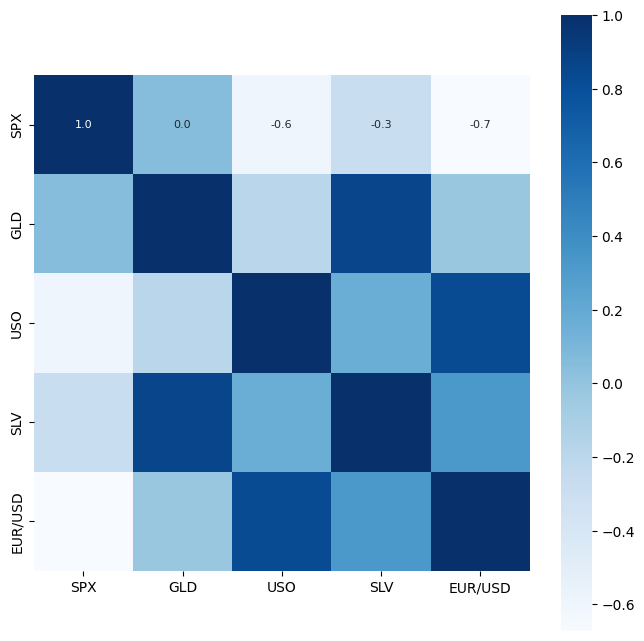

In [65]:
plt.figure(figsize=(8,8))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')

In [66]:
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


C:\Users\Asus\AppData\Local\Temp\ipykernel_29284\396530116.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(gold_data['GLD'], color = 'maroon')
C:\Users\Asus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='GLD', ylabel='Density'>

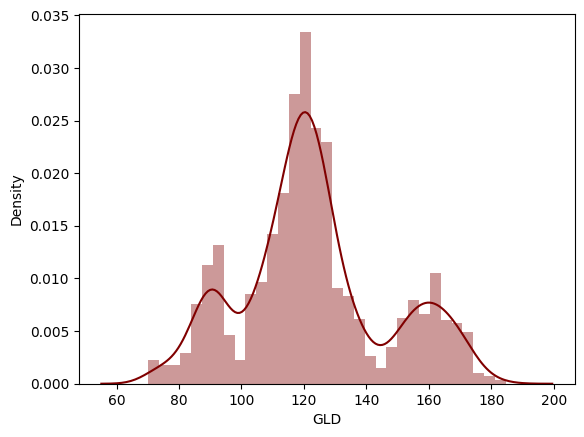

In [67]:
sns.distplot(gold_data['GLD'], color = 'maroon')

In [68]:
X = gold_df.drop(['Date', 'GLD'], axis=1)
Y = gold_df['GLD']

In [69]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 2)

In [70]:
regressor = RandomForestRegressor(n_estimators = 100)

In [71]:
regressor.fit(X_train, Y_train)

RandomForestRegressor()

In [72]:
test_data_pred = regressor.predict(X_test)
print(test_data_pred)

[168.53929934  82.31779967 116.1629999  127.81190121 120.78160093
 154.94369762 150.15179941 125.89230059 117.49149879 125.92050115
 116.64590115 171.86690112 141.82549898 168.01819855 115.18900026
 117.7462004  138.43100327 169.99920053 159.0903028  162.93269907
 155.1446003  124.99560043 176.73609917 157.41470325 125.22240047
  93.98629999  76.99980036 120.45910012 119.13669952 167.48659976
  88.29430083 125.39520001  91.01580072 117.66769984 121.06829911
 136.04250078 115.49370163 115.22450079 146.63749879 107.09680102
 104.56320248  87.11659793 126.42700063 118.09600016 152.67279864
 119.61610052 108.4398001  108.14689824  93.15050071 127.11199774
  74.93040019 113.69579911 121.18760009 111.22979901 118.99419879
 120.47499957 158.2250999  167.83070114 147.14819703  85.60879832
  94.49360037  86.77709878  90.64069991 119.10020066 126.47820076
 127.49379972 170.93920037 122.34429941 117.24379884  98.46270039
 168.77760151 143.12349829 132.0565022  121.25800247 120.72819954
 119.67320

In [73]:
error_score = metrics.r2_score(Y_test, test_data_pred)
print(error_score)

0.9889187986429863


In [75]:
Y_test = list(Y_test)

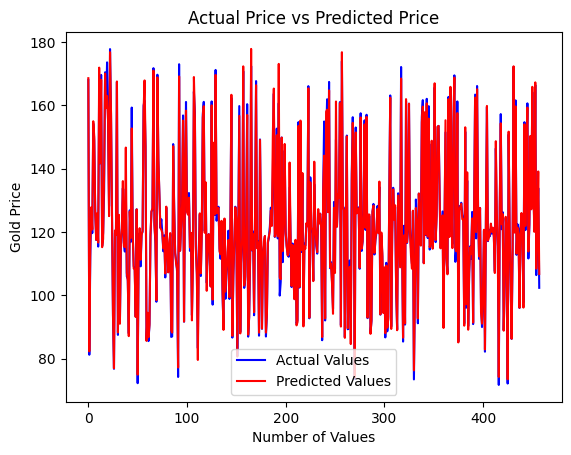

In [80]:
plt.plot(Y_test, color = 'blue', label = 'Actual Values') 
plt.plot(test_data_pred, color = 'red', label = 'Predicted Values')
plt.title('Actual Price vs Predicted Price')
plt.xlabel("Number of Values")
plt.ylabel("Gold Price")
plt.legend()
plt.show()